# [#5.Lab] Regression with Pytorch
- Linear Regression vs MLP

## 1. Data Generation (Preparation)
- X, Y 데이터를 3D 공간에 시각화
- numpy의 random.rand() 함수를 사용하면 n개의 랜덤 샘플을 0~1의 uniform distribution에서 샘플링 할 수 있음

In [1]:
import numpy as np
x1 = [1,2,3,4,5]
x2 = [6,7,8,9,10]
X = np.array([x1, x2]).T
X

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

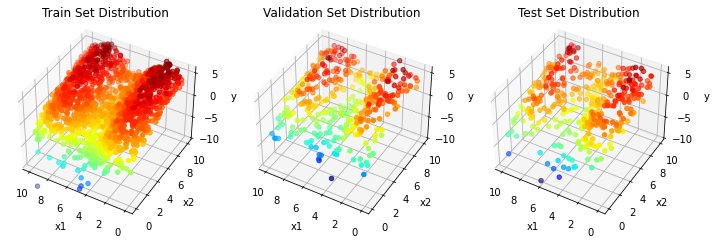

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# =====Generating Dataset=====
num_data = 2400  # 2400개의 data
x1 = np.random.rand(num_data) * 10
x2 = np.random.rand(num_data) * 10
e = np.random.normal(0, 0.5, num_data)  # error

# (2400,2) 첫 번째 dimension의 값이 우리가 갖고 있는 data sample의 값이 되도록 전치
# 뒤에 있는 pytorch들이 모두 맨 첫 번째 행렬은 sample의 개수를 받도록 되어있음
X = np.array([x1, x2]).T                
y = 2*np.sin(x1) + np.log(0.5*x2**2) + e

# =====Split Dataset into Train, Validation, Test=====
train_X, train_y = X[:1600, :], y[:1600]
val_X, val_y = X[1600:2000, :], y[1600:2000]
test_X, test_y = X[2000:, :], y[2000:]

# =====Visualize Each Dataset=====
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(train_X[:, 0], train_X[:, 1], train_y, c=train_y, cmap='jet')

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train Set Distribution')
ax1.set_zlim(-10, 6)  # z축의 범위를 설정
ax1.view_init(40,-60) # 3D에서 각도를 설정
ax1.invert_xaxis()    # x축을 바꿔줌

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(val_X[:, 0], val_X[:, 1], val_y, c=val_y, cmap='jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validation Set Distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40,-60)
ax2.invert_xaxis()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40,-60)
ax3.invert_xaxis()

plt.show()

## 2. Hypothesis Define (Model Define)
- Linear Regression 시에 활용하는 H(x) = Wx + b를 파이토치로 구현할 때는 단순하게 nn.Linear 모듈을 하나 만들어주면 됨
- 이때 in_features는 x 차원이고, out_features는 y의 차원

In [3]:
import torch
import torch.nn as nn

class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()  # 상속을 하고 나면 꼭 써줘야 하는 문법
        self.linear = nn.Linear(in_features=2, out_features=1, bias=True)  
        # nn.Linear : XW + b의 기능을 함
        # w는 (2x1), b는 1 짜리인 파라미터를 만들어줌. 랜덤으로 초기화해줌
        # bias=False : b 없이 XW만 존재. CNN에서는 bias 없이도 filter를 쓰는 경우가 있음

    def forward(self, x):
        # instance(샘플) x가 input으로 들어왔을 때 모델이 예측하는 y값을 return
        return self.linear(X)

class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)  # linear transformation을 함 (WX + b)
        x = self.relu(x)     # 선형적이지 않은 함수를 한 번 통과시킴
        x = self.linear2(x)  # 다시 linear transformation
        return x

lm = LinearModel()
print(lm.linear.weight)  # nn.Module 내부에서 알아서 parameter들을 초기화하여 갖고 있음
print(lm.linear.bias)  

Parameter containing:
tensor([[-0.3533,  0.3665]], requires_grad=True)
Parameter containing:
tensor([0.6413], requires_grad=True)


## 3. Cost Function Define (Loss Function Define)
- Regression Probelm에서의 Loss Function을 작성
- 파이토치의 nn 아래에는 다양한 Loss Function이 이미 구현되어 있음
- 이 실습은 Regression Problem이므로 Mean Squared Error 즉, MSE Loss를 사용

In [4]:
reg_loss = nn.MSELoss()

# uncomment for testing Loss Function

"""
# torch.Tensor : tensor는 gradient을 기본으로 지원해줌
# torch의 연산을 활용하려면 torch.Tensor로 감싸서 형을 변환해야 함
# print(type([0,0,0,0]))                    # list
# print(type(torch.Tensor([0,0,0,0])))      # torch.Tensor 
test_pred_y = torch.Tensor([0,0,0,0])
test_true_y = torch.Tensor([0,1,0,1])


print(reg_loss(test_pred_y, test_true_y))  
print(reg_loss(test_true_y, test_true_y))   # 100%로 예측
"""

'\n# torch.Tensor : tensor는 gradient을 기본으로 지원해줌\n# torch의 연산을 활용하려면 torch.Tensor로 감싸서 형을 변환해야 함\n# print(type([0,0,0,0]))                    # list\n# print(type(torch.Tensor([0,0,0,0])))      # torch.Tensor \ntest_pred_y = torch.Tensor([0,0,0,0])\ntest_true_y = torch.Tensor([0,1,0,1])\n\n\nprint(reg_loss(test_pred_y, test_true_y))  \nprint(reg_loss(test_true_y, test_true_y))   # 100%로 예측\n'

## 4. Train & Evaluation
- 이전에는 직접 파라미터(w 하나)에 따른 loss의 편미분을 유도하고 거기에서 나온 gradient로 w를 업데이트했음
- pytorch에서는 loss.backward()라는 기능을 쓰면 알아서 loss가 계산되는데 사용한 각 파라미터에 대한 loss의 편미분을 계산해줌
- 이후 optimizer.step() 함수를 사용하면 각 파라미터의 gradient를 바탕으로 파라미터의 값을 조금씩 update 해줌 
- 이때 모델은 매 Iteration 때마다 Train Set에 의해 학습되면서 동시에 Validation Set을 넣고 Loss를 비교하게 됨
- 그리고 우리가 평가하고 싶은 때마다(지금은 200번) Test Set을 넣고 Visualize 하는데 필요한 Predicted y값과 Metric 값을 계산함
- 여기서 Metric으로는 mean absolute error(MAE)를 활용

801 parameters


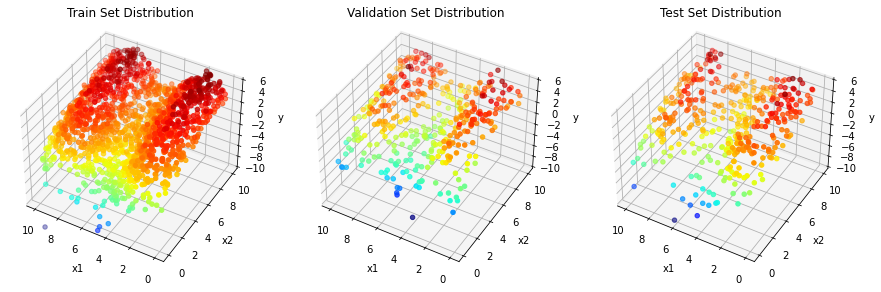

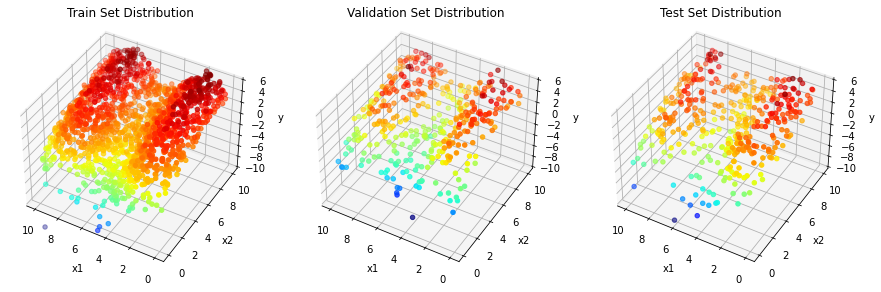

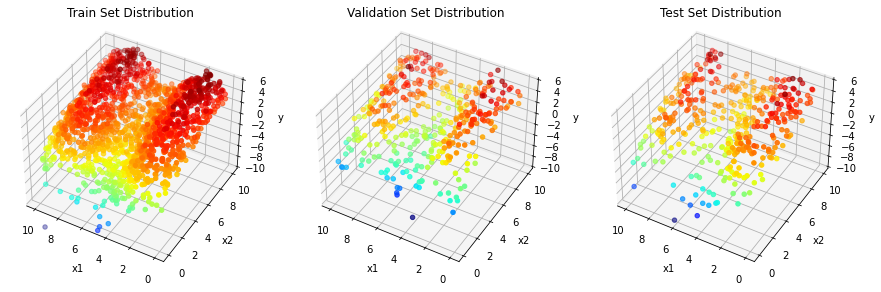

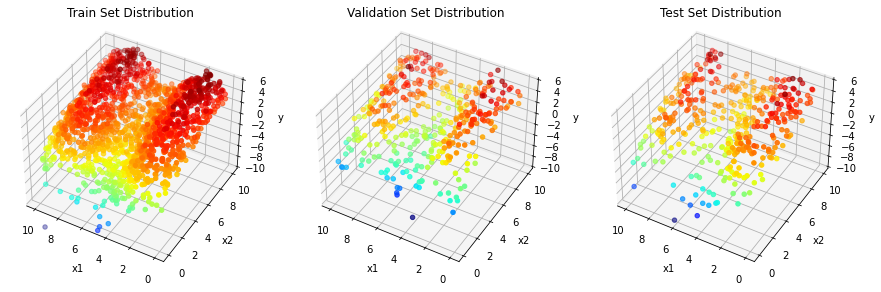

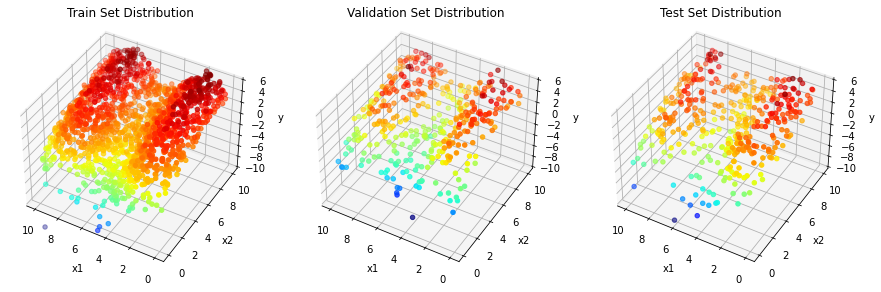

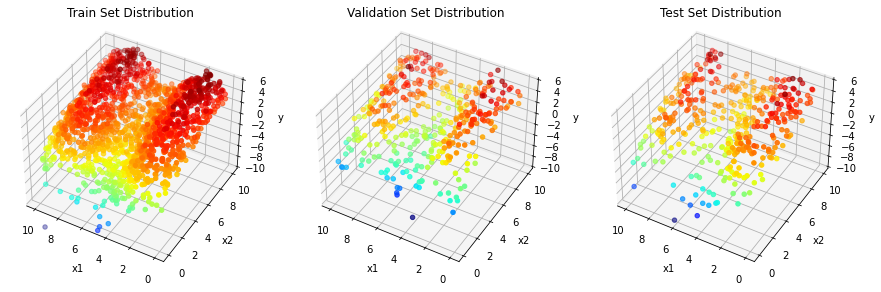

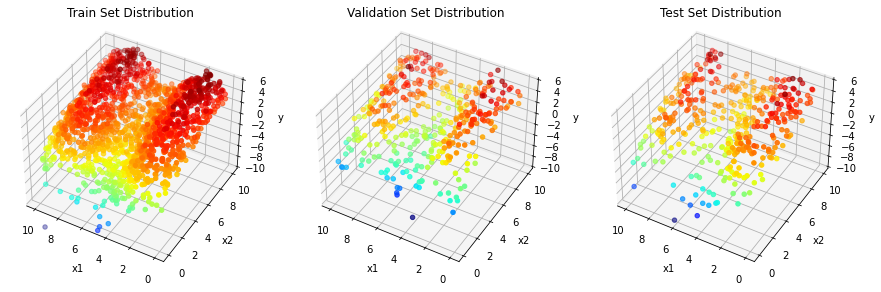

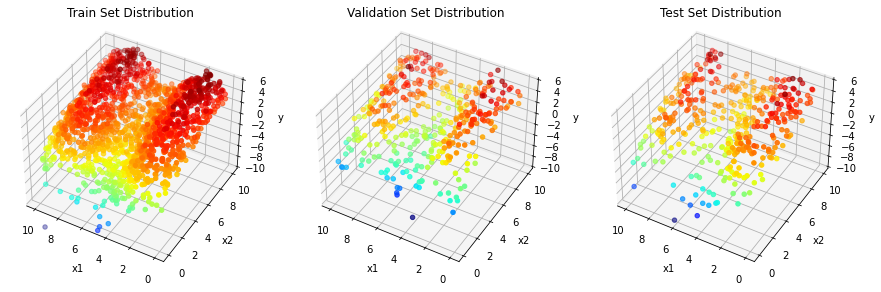

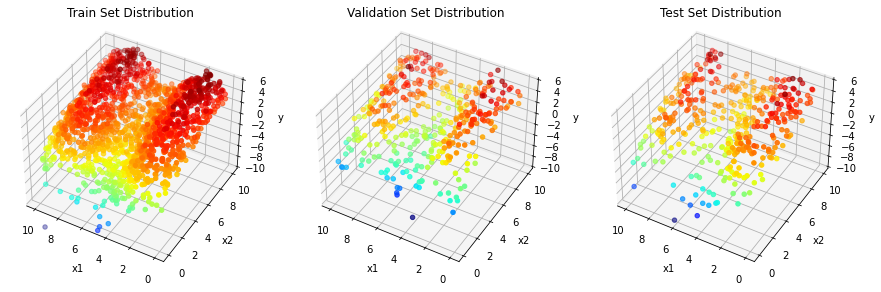

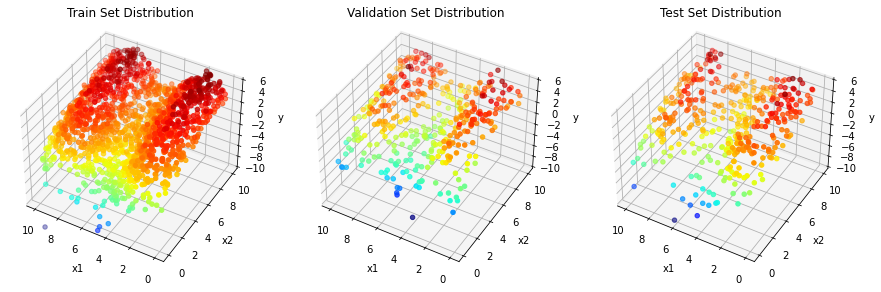

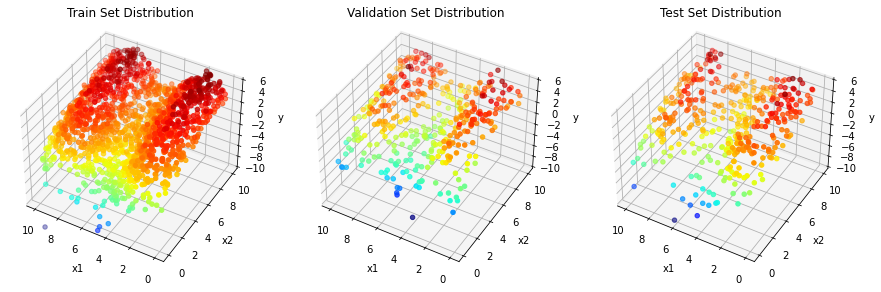

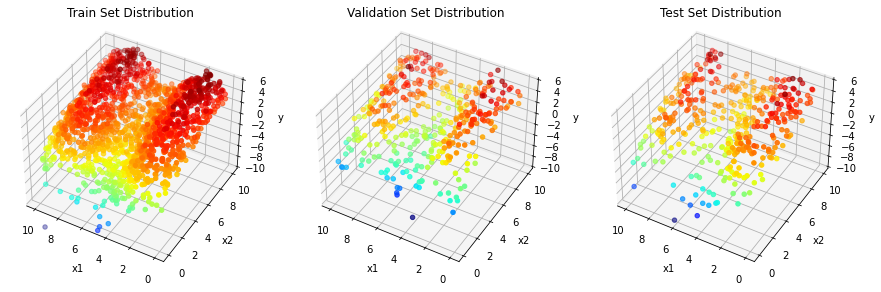

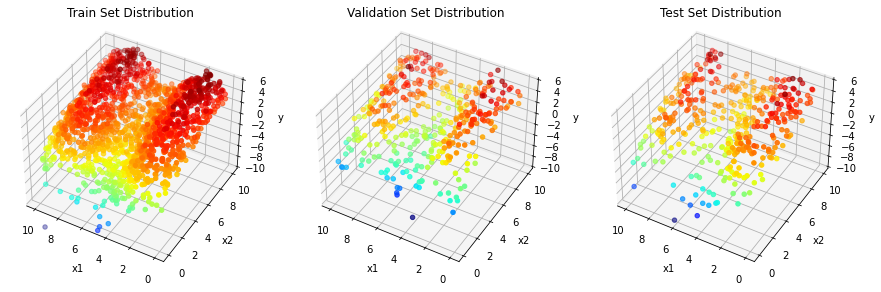

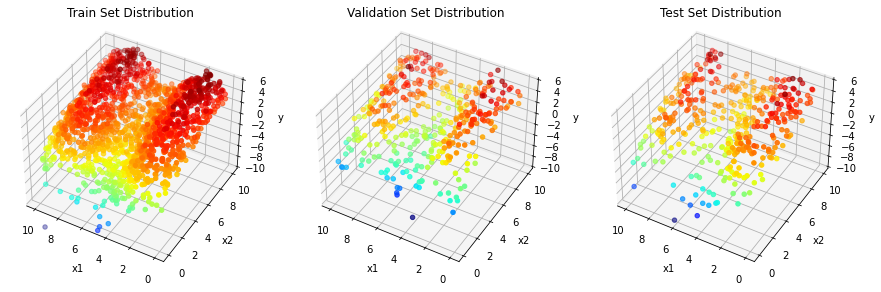

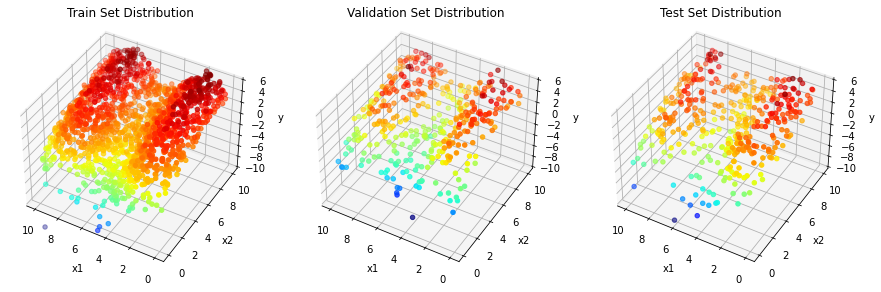

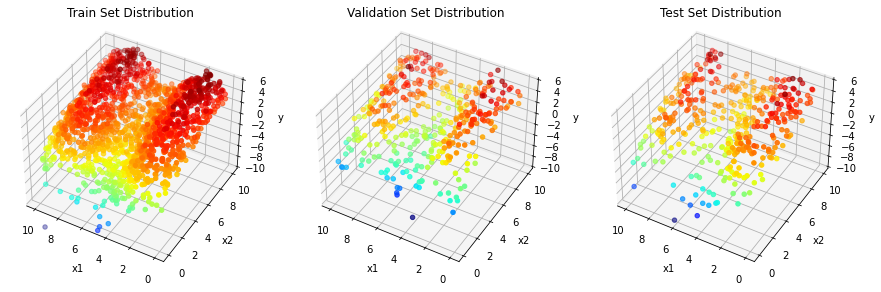

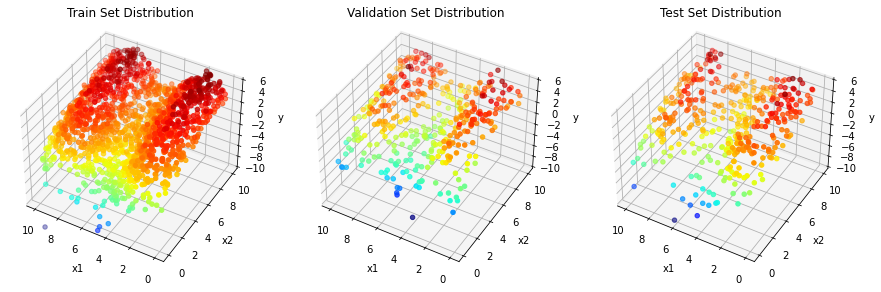

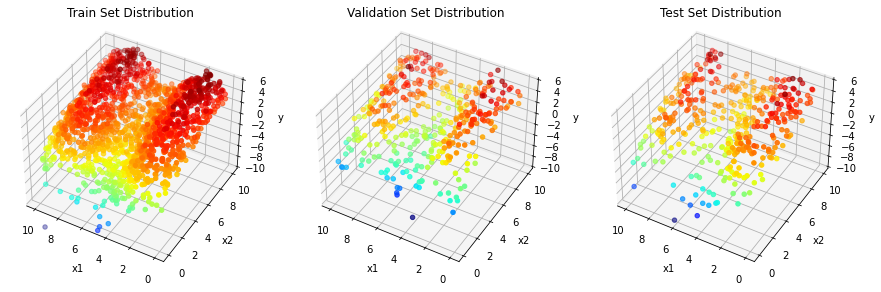

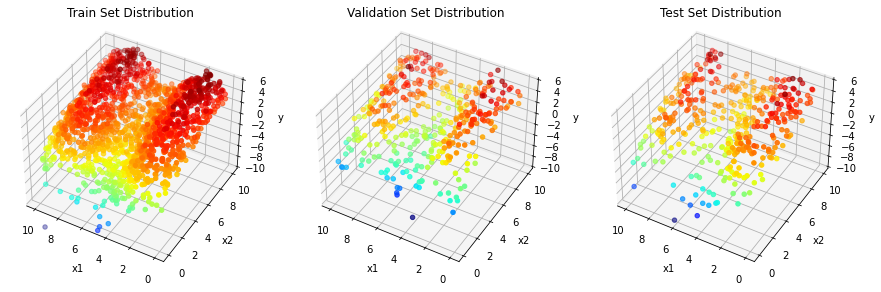

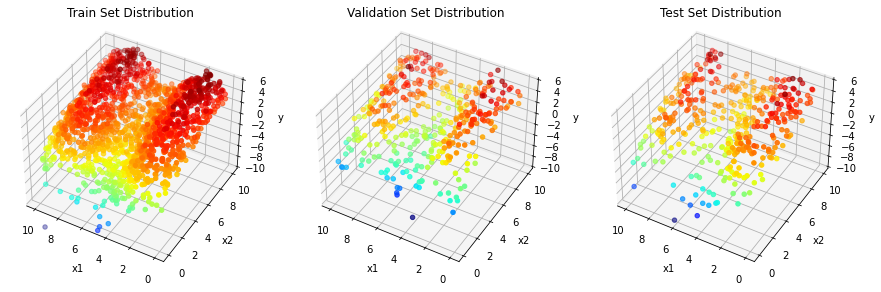

In [7]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

# =====Construct Model=====
model = LinearModel()


model = MLPModel()  # Model을 생성
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))  # 복잡해 보이지만 간단히 모델 내에 학습

# =====Construct Optimizer=====
lr = 0.005  
optimizer = optim.SGD(model.parameters(), lr=lr)  # Optimizer 생성. model.parameters() : 어떤 파라미터들을 update 할 것인지

# 매 학습 단계에서의 epoch값과 그 때의 loss값을 저장할 리스트
list_epoch = []
list_train_loss = []
list_val_loss = []
list_mae = []
list_mae_epoch = []

epoch = 4000    # 학습 횟수(epoch)를 지정. 내가 가진 data를 model에게 몇 번 보여주면서 학습시킬 것인지
# cf. iteration : parameter가 1번 update되는 것
for i in range(epoch):

    # =====Train=====

    # 가끔 특정 layer는 train을 할 때는 그 기능이 활성화되는데, eval할 때는 그 기능을 꺼줘야 하는 경우가 있음
    model.train()              # model을 train 모드로 세팅. 반대로 향후 모델을 평가할 때는 eval() 모드로 변경
    optimizer.zero_grad()      # optimizer에 남아있을 수도 있는 잔여 gradient를 0으로 초기화
    # 한 번 train을 하고나면 gradient가 계산된 것이 남아있을 수 있음. 이것을 초기화하지 않고 또 돌려버리면 gradient가 더해짐
    # 즉 gradient가 중첩이 되거나 발산해버리는 경우가 생김

    
    input_x = torch.Tensor(train_X)
    true_y = torch.Tensor(train_y)
    pred_y = model(input_x)    # [1600, 1] list안에 [1600, 1]의 값이 있음
    # print(input_x.shape, true_y.shape, pred_y.shape)  각 input과 output의 차원을 확인

    loss = reg_loss(pred_y.squeeze(), true_y)   # 그냥 1600의 사이즈를 원하기 때문에, 1로 되어있는 차원을 날려줌
    loss.backward()            # backward()를 통해서 gradient를 구함
    optimizer.step()           # step()을 통해서 gradient를 바탕으로 parameter을 update
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy())

    # =====Validation=====
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y)
    pred_y = model(input_x)
    loss = reg_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())


    # =====Evaluation=====
    if i % 200 == 0:    # 200회의 학습마다 실제 데이터 분포와 모델이 예측한 분포를 그림

        # =====Calculate MAE=====
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().numpy()
        mae = mean_absolute_error(true_y, pred_y)   # sklearn 쪽 함수들은 true_y가 먼저, pred_y가 나중에 인자로 들어가는 것에 주의
        list_mae.append(mae)
        list_mae_epoch.append(i)

        fig = plt.figure(figsize=(15,5))

        # =====True Y Scattering=====
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(train_X[:, 0], train_X[:, 1], train_y, c=train_y, cmap='jet')

        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_zlabel('y')
        ax1.set_title('Train Set Distribution')
        ax1.set_zlim(-10, 6)  # z축의 범위를 설정
        ax1.view_init(40,-60) # 3D에서 각도를 설정
        ax1.invert_xaxis()    # x축을 바꿔줌

        ax2 = fig.add_subplot(1, 3, 2, projection='3d')
        ax2.scatter(val_X[:, 0], val_X[:, 1], val_y, c=val_y, cmap='jet')

        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_zlabel('y')
        ax2.set_title('Validation Set Distribution')
        ax2.set_zlim(-10, 6)
        ax2.view_init(40,-60)
        ax2.invert_xaxis()

        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')

        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_zlabel('y')
        ax3.set_title('Test Set Distribution')
        ax3.set_zlim(-10, 6)
        ax3.view_init(40,-60)
        ax3.invert_xaxis()

        plt.show()



## 5. Report Experiment